In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
data=pd.read_csv('restaurent_Data_Train.csv',encoding = 'unicode_escape')
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [162]:
data.shape

(12690, 9)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [164]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [165]:
data.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [166]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
data['CITY']=imp.fit_transform(data['CITY'].values.reshape(-1,1))
data['LOCALITY']=imp.fit_transform(data['LOCALITY'].values.reshape(-1,1))
data['RATING']=imp.fit_transform(data['RATING'].values.reshape(-1,1))
data['VOTES']=imp.fit_transform(data['VOTES'].values.reshape(-1,1))
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [167]:
data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [169]:
data.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


In [170]:
#chaging values from string to integer 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['TITLE']=le.fit_transform(data['TITLE'])
data['CUISINES']=le.fit_transform(data['CUISINES'])
data['TIME']=le.fit_transform(data['TIME'])
data['CITY']=le.fit_transform(data['CITY'])
data['LOCALITY']=le.fit_transform(data['LOCALITY'])

In [171]:
data=data.drop('RATING',axis=1)

In [172]:
data=data.drop('VOTES',axis=1)

In [173]:
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,COST
0,31,9438,2627,739,320,285,1200
1,33,13198,289,1885,67,1046,1500
2,31,10915,2976,661,67,1101,800
3,95,6346,4130,275,222,136,800
4,50,15387,1766,615,222,620,300
...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,131,342,500
12686,33,9686,2143,1177,222,133,1800
12687,71,11133,2088,1137,239,1342,1300
12688,31,6134,3506,1837,67,631,400


In [174]:
data.corr()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,COST
TITLE,1.000000,0.002487,0.244866,0.053914,-0.016281,0.026614,-0.263581
RESTAURANT_ID,0.002487,1.000000,0.056239,0.008157,0.005112,-0.004242,0.040710
CUISINES,0.244866,0.056239,1.000000,0.104741,0.023931,0.016504,-0.014078
TIME,0.053914,0.008157,0.104741,1.000000,-0.011372,-0.008062,0.018248
CITY,-0.016281,0.005112,0.023931,-0.011372,1.000000,0.043072,0.044555
LOCALITY,0.026614,-0.004242,0.016504,-0.008062,0.043072,1.000000,-0.015050
COST,-0.263581,0.040710,-0.014078,0.018248,0.044555,-0.015050,1.000000


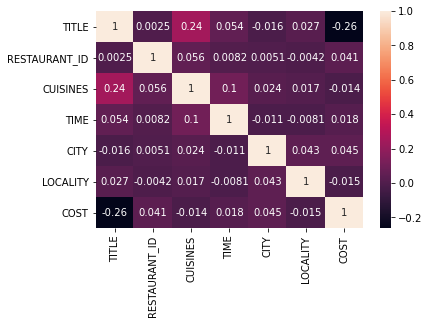

In [175]:
sns.heatmap(data.corr(),annot=True)

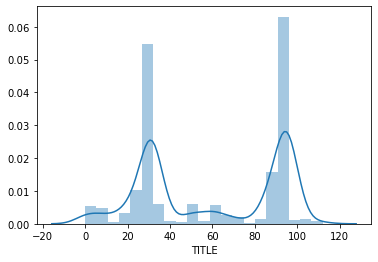

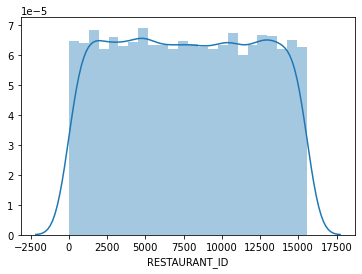

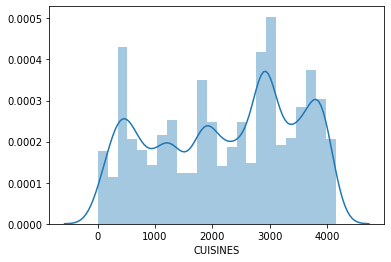

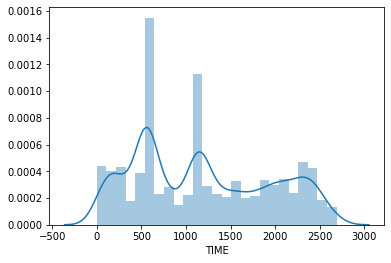

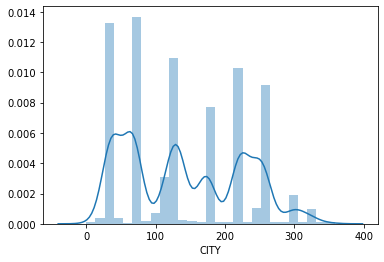

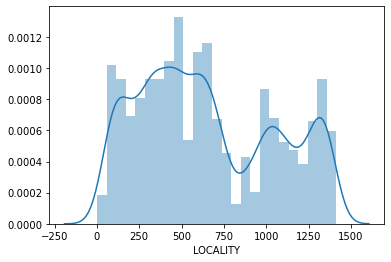

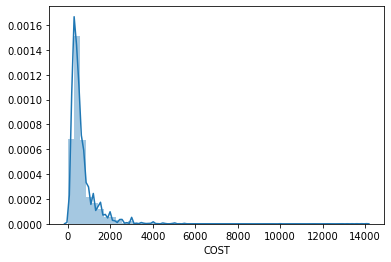

In [176]:
#checking distribution of data
for j in data.columns:
    sns.distplot(data[j])
    plt.show()

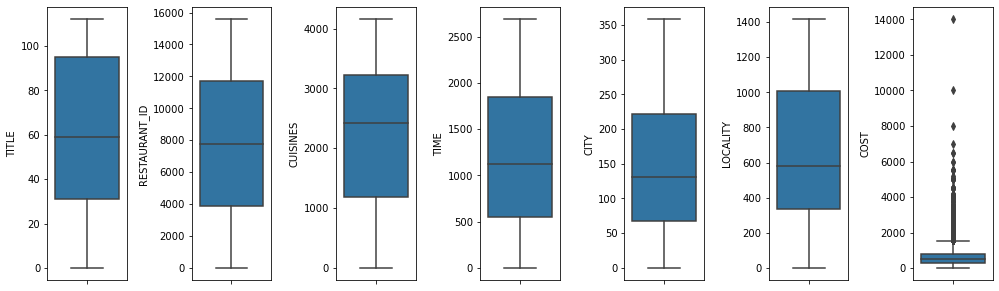

In [177]:
#boxplot of columns in dataset
col=data.columns.values
nrow=20
ncol=10
plt.figure(figsize=(20,80))
for i in range(0,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[col[i]],orient='v')
    plt.tight_layout()

In [178]:
#checking skewness of dataset
data.skew()

TITLE           -0.069803
RESTAURANT_ID    0.006947
CUISINES        -0.218782
TIME             0.306186
CITY             0.266332
LOCALITY         0.352317
COST             3.978801
dtype: float64

In [179]:
#checking outliers of dataset
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.86888688, 0.37269233, 0.32540837, ..., 2.11776187, 0.92054865,
        0.86884552],
       [0.80783894, 1.20737672, 1.61638078, ..., 0.8970816 , 0.98623851,
        1.34733058],
       [0.86888688, 0.70057234, 0.61526483, ..., 0.8970816 , 1.12404835,
        0.23086546],
       ...,
       [0.35207201, 0.74896628, 0.12224961, ..., 1.1525353 , 1.72790605,
        1.02834054],
       [0.86888688, 0.36076439, 1.055448  , ..., 0.8970816 , 0.05359943,
        0.40711461],
       [0.86888688, 0.29505519, 0.59034881, ..., 0.13443345, 1.70535535,
        0.08812458]])

In [180]:
threshold=3
print(np.where(z>3))

(array([   84,   208,   308,   337,   379,   422,   469,   502,   563,
         731,   839,   966,   967,   973,  1133,  1193,  1288,  1345,
        1395,  1470,  1475,  1594,  1632,  1657,  1759,  1778,  1828,
        1878,  1884,  1916,  1930,  1931,  2100,  2111,  2205,  2207,
        2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,  2610,
        2622,  2683,  2686,  2689,  2695,  2740,  2940,  2973,  3002,
        3036,  3049,  3197,  3211,  3309,  3338,  3396,  3492,  3526,
        3532,  3554,  3603,  3688,  3692,  3704,  3715,  3730,  3773,
        3847,  3891,  3896,  3905,  3942,  3953,  3962,  4147,  4152,
        4224,  4273,  4279,  4285,  4298,  4323,  4494,  4524,  4554,
        4558,  4659,  4693,  4708,  4728,  4904,  4931,  5098,  5108,
        5133,  5173,  5202,  5264,  5588,  5841,  5843,  5874,  5934,
        5944,  5975,  6024,  6136,  6147,  6343,  6475,  6505,  6640,
        6644,  6804,  6949,  6997,  7034,  7073,  7078,  7275,  7316,
        7362,  7369

In [181]:
#new datset without outliers
dfx=data[(z<3).all(axis=1)]

In [182]:
dfx.shape

(12466, 7)

In [183]:
data.shape

(12690, 7)

In [184]:
#splitting of dataset
dfx=data.drop(columns=['COST'])

In [185]:
#scaling of x data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)

In [186]:
y=pd.DataFrame(data['COST'])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [189]:
print(x_train.shape,'\t\t', x_test.shape)

(10152, 6) 		 (2538, 6)


In [190]:
print(y_train.shape,'\t\t', y_test.shape)

(10152, 1) 		 (2538, 1)


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [192]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m, ' is ', score)
    print('mean_absolute_error:-',mean_absolute_error(y_test,predm))
    print('mean_squared_error:-',mean_squared_error(y_test,predm))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:-', r2_score(y_test,predm))
    print('----------------------------------')
    print('\t')

score of  LinearRegression()  is  0.07449379702456094
mean_absolute_error:- 348.2828479642201
mean_squared_error:- 330464.54127657035
RMSE:- 574.8604537420977
r2_score:- 0.08178755635229529
----------------------------------
	
score of  SVR()  is  0.01774357070303867
mean_absolute_error:- 312.3725746613592
mean_squared_error:- 350401.2458532143
RMSE:- 591.9469958139954
r2_score:- 0.02639241423844907
----------------------------------
	
score of  DecisionTreeRegressor()  is  1.0
mean_absolute_error:- 267.1859732072498
mean_squared_error:- 227102.15524034674
RMSE:- 476.55236358699
r2_score:- 0.3689851742781106
----------------------------------
	
score of  KNeighborsRegressor()  is  0.569446170153165
mean_absolute_error:- 279.3449172576832
mean_squared_error:- 224345.74353033883
RMSE:- 473.6515000824328
r2_score:- 0.3766440036404637
----------------------------------
	
score of  Lasso()  is  0.0744780231917963
mean_absolute_error:- 348.3375204127156
mean_squared_error:- 330542.4986604180

In [193]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('model;-',m)
    print('score:-',score)
    print('mean score;-',score.mean())
    print('standard deviation',score.std())
    print('**************************************************************************************************************')
    print('\n')

model;- LinearRegression()
score:- [0.08691846 0.0454652  0.0546396  0.07374301 0.09609887 0.0969737
 0.07608719 0.07011882 0.07441481 0.09989197]
mean score;- 0.07743516195535662
standard deviation 0.01715851471230969
**************************************************************************************************************


model;- SVR()
score:- [ 0.0406666   0.00131151  0.01755811  0.03169591  0.03431878  0.03569642
  0.02059334 -0.0012999   0.01952979  0.02571213]
mean score;- 0.022578270302630443
standard deviation 0.013382609251891454
**************************************************************************************************************


model;- DecisionTreeRegressor()
score:- [0.47330445 0.44953759 0.61051907 0.55074109 0.50874662 0.38817672
 0.56187767 0.30485721 0.49685349 0.51872699]
mean score;- 0.48633409062003513
standard deviation 0.08428034433421183
**************************************************************************************************************


In [194]:
from sklearn.model_selection import GridSearchCV

param={'n_estimators':[200,300,400,500,600],'max_depth':[2,3,4,5,6,15,20]}
gb=RandomForestRegressor()
clf=GridSearchCV(gb,param)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 300}


In [196]:
model=[RandomForestRegressor(max_depth= 20, n_estimators=300)]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m, ' is ', score)
    print('mean_absolute_error:-',mean_absolute_error(y_test,predm))
    print('mean_squared_error:-',mean_squared_error(y_test,predm))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:-', r2_score(y_test,predm))


score of  RandomForestRegressor(max_depth=20, n_estimators=300)  is  0.9426230341281054
mean_absolute_error:- 187.65883916383228
mean_squared_error:- 103043.85474221238
RMSE:- 321.0044466081621
r2_score:- 0.7136874373866926


In [197]:
#saving model of dataset where average price is target
from joblib import dump
dump(model, 'restaurent_train.joblib') 

['restaurent_train.joblib']

In [220]:
data1=pd.read_csv('restaurent_Data_Test.csv',encoding = 'unicode_escape')
data1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [221]:
data1.shape

(4231, 8)

In [222]:
data1.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [223]:
data1.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [224]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
data1['CITY']=imp.fit_transform(data1['CITY'].values.reshape(-1,1))
data1['LOCALITY']=imp.fit_transform(data1['LOCALITY'].values.reshape(-1,1))
data1['RATING']=imp.fit_transform(data1['RATING'].values.reshape(-1,1))
data1['VOTES']=imp.fit_transform(data1['VOTES'].values.reshape(-1,1))
data1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


In [225]:
data1=data1.drop('RATING',axis=1)
data1=data1.drop('VOTES',axis=1)

In [226]:
data1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor
...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi


In [227]:
#chaging values from string to integer 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['TITLE']=le.fit_transform(data1['TITLE'])
data1['CUISINES']=le.fit_transform(data1['CUISINES'])
data1['TIME']=le.fit_transform(data1['TIME'])
data1['CITY']=le.fit_transform(data1['CITY'])
data1['LOCALITY']=le.fit_transform(data1['LOCALITY'])

In [228]:
data1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY
0,23,4085,1293,503,110,662
1,75,12680,1632,933,96,221
2,23,1411,1455,219,96,411
3,66,204,208,1071,41,456
4,75,13453,1637,208,78,300
...,...,...,...,...,...,...
4226,23,9057,1425,103,108,597
4227,66,1247,267,262,9,237
4228,75,8617,679,1052,41,696
4229,75,6485,1541,215,78,332


In [229]:
#scaling of x data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data1)
x=pd.DataFrame(x,columns=data1.columns)

In [230]:
pred_test=m.predict(x)
print(pred_test)

[1181.67826358  363.51063315  755.48271843 ...  320.57471079  371.02664661
  339.98696215]


In [231]:
data2= pd.DataFrame(pred_test)
data2.to_csv('restaurent_test_pred.csv')
data2

,0
0,1181.678264
1,363.510633
2,755.482718
3,1711.666667
4,352.331818
...,...
4226,1024.718282
4227,1679.166667
4228,320.574711
4229,371.026647
